# Question 4: Bike Sharing Demand 


## Part 1: Explain maximum likelihood estimation in poisson regression and derive the loss function which is used to estimate the parameteres.
mean of poisson's equation:
\begin{align}
\lambda = \mathbb{E}[Y|x] = e^{\theta^Tx}
\end{align}
Pdf for poissons eqn is given as
\begin{align}
p(y|x,\theta) = \frac{\lambda^ye^{-\lambda}}{y!} = \frac{e^{y\theta^Tx}e^{-e^{\theta^Tx}}}{y!}
\end{align}
the probability for observing y1.....yn is given as 
\begin{align}
{\displaystyle p(y_{1},\ldots ,y_{m}\mid x_{1},\ldots ,x_{m};\theta )=\prod _{i=1}^{m}{\frac {e^{y_{i}\theta 'x_{i}}e^{-e^{\theta 'x_{i}}}}{y_{i}!}}.}
\end{align}
the above equation can be represented as likelihood function
\begin{align}
{\displaystyle L(\theta \mid X,Y)=\prod _{i=1}^{m}{\frac {e^{y_{i}\theta 'x_{i}}e^{-e^{\theta 'x_{i}}}}{y_{i}!}}.}
\end{align}
taking log ov above likelihood function gives us log likelihood function
\begin{align}
{\displaystyle \ell (\theta \mid X,Y)=\log L(\theta \mid X,Y)=\sum _{i=1}^{m}\left(y_{i}\theta 'x_{i}-e^{\theta 'x_{i}}-\log(y_{i}!)\right).}
\end{align}

\begin{align}
{\displaystyle \ell (\theta \mid X,Y)=\sum _{i=1}^{m}\left(y_{i}\theta 'x_{i}-e^{\theta 'x_{i}}\right).}
\end{align}

minimising log likelihood and solving for theta

\begin{align}
\underset{\theta}{minimize}\space {\displaystyle \ell (\theta \mid X,Y)=\sum _{i=1}^{m}\left(e^{\theta 'x_{i}}-y_{i}\theta 'x_{i}\right).}
\end{align}



\begin{align}
\nabla \ell (\theta \mid X,Y) = \frac {\partial \ell (\theta \mid X,Y)}{\partial \theta } = \sum_{i=1}^{m} \left(e^{\theta 'x_{i}}-y_{i}\right) x_{i}
\end{align}


we get theta as:-
\begin{align}
\theta := \theta - \alpha \nabla \ell (\theta \mid X,Y)
\end{align}


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

### Importing Data files

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(2)
display(test.head(2))

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


### Processing Given Data

In [4]:
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['dayOfWeek'] = pd.DatetimeIndex(train['datetime']).weekday
train['hour'] = pd.DatetimeIndex(train['datetime']).hour

In [5]:
test['year'] = pd.DatetimeIndex(test['datetime']).year
test['month'] = pd.DatetimeIndex(test['datetime']).month
test['day'] = pd.DatetimeIndex(test['datetime']).day
test['dayOfWeek'] = pd.DatetimeIndex(test['datetime']).weekday
test['hour'] = pd.DatetimeIndex(test['datetime']).hour

In [6]:
train = train[['year','season','month','day','dayOfWeek','hour','holiday','workingday', 'weather','temp','atemp','humidity','windspeed','count']]
train.head(2)

,year,season,month,day,dayOfWeek,hour,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011,1,1,1,5,0,0,0,1,9.84,14.395,81,0.0,16
1,2011,1,1,1,5,1,0,0,1,9.02,13.635,80,0.0,40


In [7]:
test = test[['year','season','month','day','dayOfWeek','hour','holiday','workingday', 'weather','temp','atemp','humidity','windspeed']]

In [8]:
test.isnull().sum()
train.isnull().sum()

year          0
season        0
month         0
day           0
dayOfWeek     0
hour          0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

## Part 2: finding mean count per year, month, day, working day etc

In [9]:
meanY = train.groupby('year', axis = 0).mean()
print(meanY['count'])

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64


In [10]:
meanS = train.groupby('season', axis = 0).mean()
print(meanS['count'])

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64


In [11]:
meanM = train.groupby('month', axis = 0).mean()
print(meanM['count'])

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64


In [12]:
meanD = train.groupby('day', axis = 0)['count'].mean()
print(meanD)

day
1     180.333913
2     183.910995
3     194.696335
4     195.705575
5     189.765217
6     189.860140
7     183.773519
8     179.041812
9     187.897391
10    195.183566
11    195.679577
12    190.675393
13    194.160279
14    195.829268
15    201.527875
16    191.353659
17    205.660870
18    192.605684
19    192.311847
Name: count, dtype: float64


In [13]:
meanDW = train.groupby('dayOfWeek', axis = 0).mean()
print(meanDW['count'])

dayOfWeek
0    190.390716
1    189.723847
2    188.411348
3    197.296201
4    197.844343
5    196.665404
6    180.839772
Name: count, dtype: float64


In [14]:
meanH = train.groupby('hour', axis = 0).mean()
print(meanH['count'])

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64


In [15]:
meanHol = train.groupby('holiday', axis = 0).mean()
print(meanHol['count'])

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64


In [16]:
meanWD = train.groupby('workingday', axis = 0).mean()
print(meanWD['count'])

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64


In [17]:
meanW = train.groupby('weather', axis = 0).mean()
print(meanW['count'])

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64


## Part 3: Plot count against any 5 features

### a) Hypothesis Generation
Before exploring the data to understand the relationship between variables, it is recommended that we focus on hypothesis generation first.
Here are some of the hypothesis which could influence the demand of bikes:

#### Hourly trend: 
There must be high demand during office timings. Early morning and late evening can have different trend (cyclist) and low demand during 10:00 pm to 4:00 am.

#### Daily Trend:
demand of bike increases on weekdays than on weekends and holidays.

#### Season Trend:
Using of bike can be related with seasons, as people may tend not to use bike in rainy season and winter, but may prefer using bike in summer and spring.

#### Temperature:
People tends to use more bike when temprature rises.

#### Weather:
in good weather people are more likely to use bike compared to bad weather.

### b) Testing our Hypothesis with plots

In [18]:
#pd.options.display.float_format = '{3,.2f}'.format

<IPython.core.display.Javascript object>


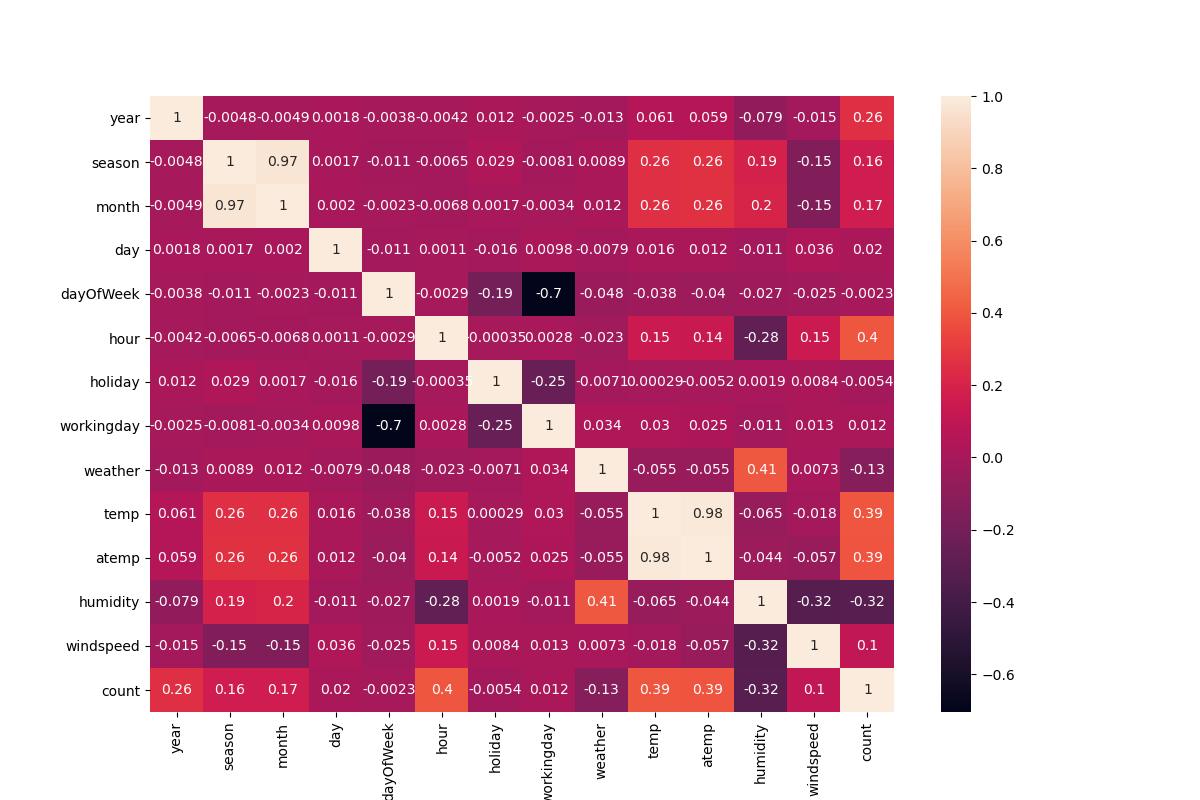

In [19]:
correlation = train.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlation, annot = True)
plt.show()

In [20]:
by_hour = train.groupby(['hour', 'workingday'])['count'].agg('sum').unstack()
by_hour.head(3)

workingday,0,1
hour,,
0,13701,11387
1,10427,4945
2,7686,2573


<IPython.core.display.Javascript object>


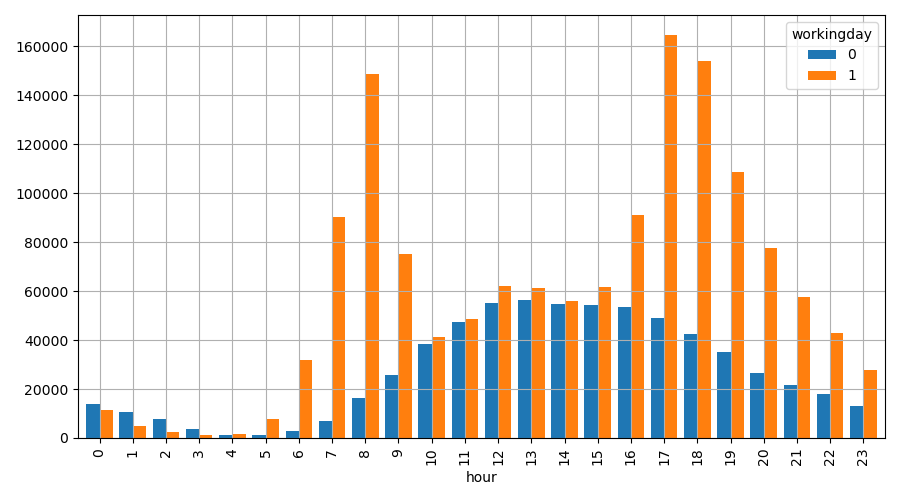

In [21]:
by_hour.plot(kind='bar', figsize=(9,5), width=0.8);
plt.grid(True)
plt.tight_layout()

we can clearly see
* on working days peak is at 7-9 in morning and 4 to 8 in evening.
* on non-working days(Holidays, Weekends) peak is very less and occurs 12-4 in noon

In [22]:
by_season = train.groupby(['season'])[['count']].agg(sum)
display(by_season)

,count
season,
1,312498
2,588282
3,640662
4,544034


<IPython.core.display.Javascript object>


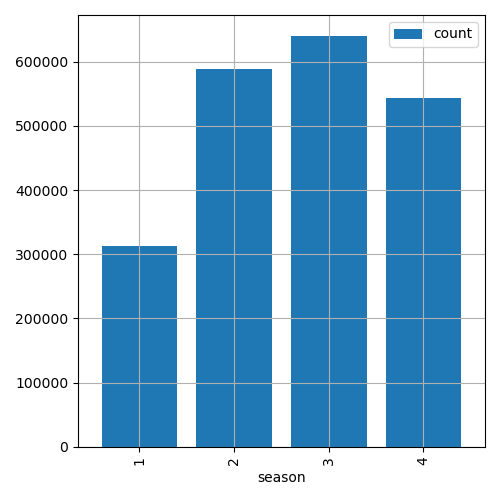

In [23]:
by_season.plot(kind='bar', figsize=(5,5), width=0.8);
plt.grid(True)
plt.tight_layout()

we can clearly see
* according to hypothesis season 1 must be rainy season and the bike demand is fairly less for that season.
* season 2, and season 3 will be spring and summer respectively
* season 4 must be winter

In [24]:
x = train.round()
by_temp = x.groupby(['atemp'])[['count']].agg(sum)

<IPython.core.display.Javascript object>


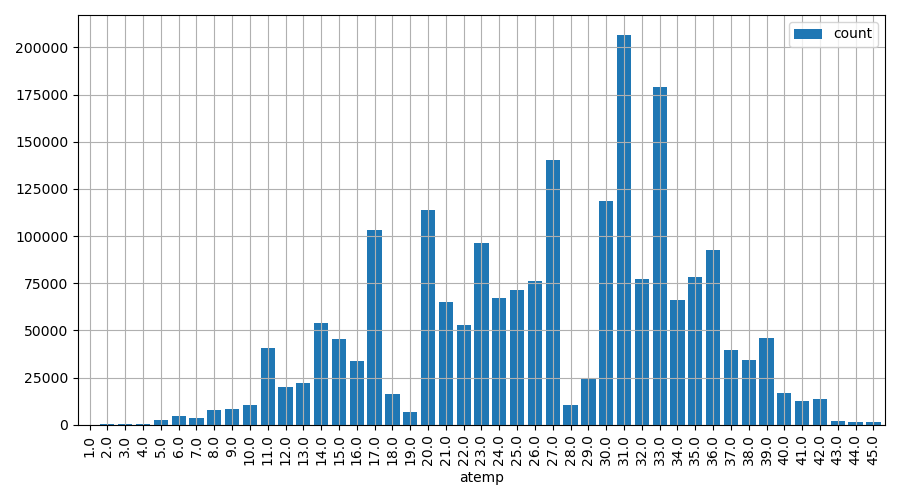

In [25]:
by_temp.plot(kind='bar', figsize=(9,5), width=0.8);
plt.grid(True)
plt.tight_layout()

we see here the vehicle rented count increase with increase in temprature till 35 C and than start to decrease.

In [26]:
by_weather = train.groupby(['weather'])[['count']].agg(sum)
display(by_season)

,count
season,
1,312498
2,588282
3,640662
4,544034


<IPython.core.display.Javascript object>


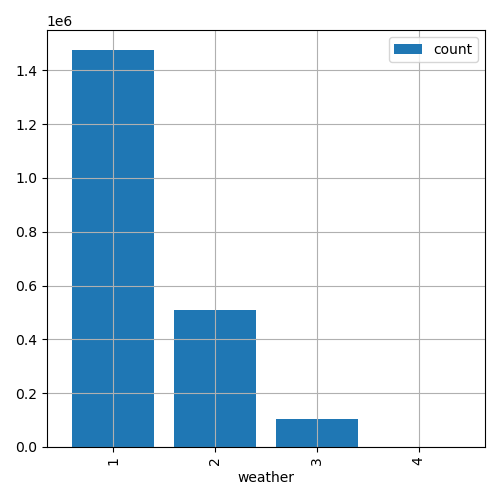

In [27]:
by_weather.plot(kind='bar', figsize=(5,5), width=0.8);
plt.grid(True)
plt.tight_layout()

we can assume :-
* weather 1 corresponds to: great weather
* weather 2 corresponds to: good weather
* weather 3 corresponds to: bad weather
* weather 4 corresponds to: worse weather

In [28]:
by_dayOfWeek = train.groupby(['dayOfWeek'])[['count']].agg(sum)
display(by_dayOfWeek)

,count
dayOfWeek,
0,295296
1,291985
2,292226
3,306401
4,302504
5,311518
6,285546


<IPython.core.display.Javascript object>


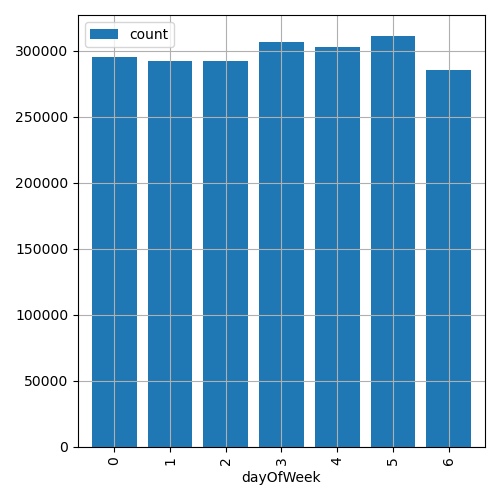

In [29]:
by_dayOfWeek.plot(kind='bar', figsize=(5,5), width=0.8);
plt.grid(True)
plt.tight_layout()

Clearly we could not stablish any clear relationship between day of week and bike rent count

## Part 4: Apply L1 and L2 norm regularization over weight vectors, and find the best hyper-parameter settings for the mentioned problem using validation data and report the accuracy on test data for no regularization, L1 norm regularization and L2 norm regularization.

In [30]:
train.head(2)

,year,season,month,day,dayOfWeek,hour,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011,1,1,1,5,0,0,0,1,9.84,14.395,81,0.0,16
1,2011,1,1,1,5,1,0,0,1,9.02,13.635,80,0.0,40


In [31]:
# Separating the input features and output parameter from the given training data
X_data1 = train[['year','hour','season','weather','temp','atemp','humidity','windspeed']]
y_data1 = train[['count']]
day = train[['day']]
X_data1.head()

,year,hour,season,weather,temp,atemp,humidity,windspeed
0,2011,0,1,1,9.84,14.395,81,0.0
1,2011,1,1,1,9.02,13.635,80,0.0
2,2011,2,1,1,9.02,13.635,80,0.0
3,2011,3,1,1,9.84,14.395,75,0.0
4,2011,4,1,1,9.84,14.395,75,0.0


In [32]:
def isCategory(df):
    NonCategorical = df.loc[:,'temp':'windspeed']
    Catogerical = df.loc[:,'year':'weather']
    return NonCategorical, Catogerical

In [33]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [34]:
Xdf = normalize (X_data1)
ydf = normalize(y_data1)
Xdf.head()

,year,hour,season,weather,temp,atemp,humidity,windspeed
0,0.0,0.000000,0.0,0.0,0.224490,0.305068,0.81,0.0
1,0.0,0.043478,0.0,0.0,0.204082,0.288064,0.80,0.0
2,0.0,0.086957,0.0,0.0,0.204082,0.288064,0.80,0.0
3,0.0,0.130435,0.0,0.0,0.224490,0.305068,0.75,0.0
4,0.0,0.173913,0.0,0.0,0.224490,0.305068,0.75,0.0


In [35]:
Xdf = pd.concat([Xdf , day ], axis=1)
Xdf.head(2)

,year,hour,season,weather,temp,atemp,humidity,windspeed,day
0,0.0,0.000000,0.0,0.0,0.224490,0.305068,0.81,0.0,1
1,0.0,0.043478,0.0,0.0,0.204082,0.288064,0.80,0.0,1


In [36]:
ydf = pd.concat([ydf , day ], axis=1)
ydf.head(2)

,count,day
0,0.015369,1
1,0.039959,1


In [37]:
def train_valid_split(data, cutoff_day=15):
    train = data[data['day'] <= cutoff_day]
    valid = data[data['day'] > cutoff_day]

    return train, valid

In [38]:
trainX,valX = train_valid_split(Xdf)
trainY,valY = train_valid_split(ydf)


In [39]:
trainX.pop('day') ;valX.pop('day') ;  trainY.pop('day'); valY.pop('day')

348      16
349      16
350      16
351      16
352      16
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: day, Length: 2286, dtype: int64

In [40]:
print(trainX.shape)
print(valX.shape)
print(trainY.shape)
print(valY.shape)

(8600, 8)
(2286, 8)
(8600, 1)
(2286, 1)


In [41]:
# Test data set
testX = test[['year','hour','season','weather','temp','atemp','humidity','windspeed']]

In [42]:
testX = normalize (testX)
testX.head()

,year,hour,season,weather,temp,atemp,humidity,windspeed
0,0.0,0.000000,0.0,0.0,0.25,0.2273,0.47619,0.464346
1,0.0,0.043478,0.0,0.0,0.25,0.2727,0.47619,0.000000
2,0.0,0.086957,0.0,0.0,0.25,0.2727,0.47619,0.000000
3,0.0,0.130435,0.0,0.0,0.25,0.2576,0.47619,0.196458
4,0.0,0.173913,0.0,0.0,0.25,0.2576,0.47619,0.196458


In [43]:
def prediction(w, X):
    yCap = np.exp(np.matmul(X, w))
    return yCap

In [44]:
def gradient(X, y, yCap):
    gradient = np.divide(np.matmul(np.transpose(X), np.subtract(yCap, y)), len(y))
    return gradient
    
def G_l1(X, y, yCap, w, reg_const):
    G_l1 = gradient(X, y, yCap)
    n = len(w)
    for i in range(len(w)):
        if w[i,0] > 0:
            G_l1[i,0] += (reg_const / n)
        else: 
            G_l1[i,0] -= (reg_const / n)            
    return G_l1
    
def G_l2(X, y, yCap, w, reg_const):
    gradient_values_l2 = gradient(X, y, yCap) + reg_const * w 
    return gradient_values_l2 # L2 norm regularized weight parameters

In [45]:
def gradient_descent(X,y,alpha=0.1,iterations=50000,norm=0,reg_const=0):

    w = np.zeros((len(X[1,:]), 1)) #np.zeros((X.shape[1], 1))
    
    Loss = []
        
    for i in range(iterations):
        yCap = prediction(w, X)
        if norm == 1: # L1 Regularization
            gradient_value = G_l1(X, y, yCap, w, reg_const)
            L = float(np.sum(np.subtract(yCap,np.multiply(y,np.matmul(X, w))))+((reg_const/2)*np.sum(gradient_value)))
        elif norm == 2: # L2 Regularization
            gradient_value = G_l2(X, y, yCap, w, reg_const)
            L = float(np.sum(np.subtract(yCap,np.multiply(y,np.matmul(X, w))))+((reg_const/2)*np.matmul(gradient_value.T,gradient_value)))
        else:
            gradient_value = gradient(X, y, yCap)
            L = float(np.sum(np.subtract(yCap,np.multiply(y,np.matmul(X, w)))))
        Loss.append(L)
        
        w = np.subtract(w, alpha * gradient_value)
        
    return w, Loss 

In [46]:
trainX = trainX.to_numpy()
trainY = trainY.to_numpy()
valX = valX.to_numpy()
valY = valY.to_numpy()
testX = testX.to_numpy()

In [47]:
w,Loss = gradient_descent(trainX, trainY, iterations = 50000, norm=0)
print('Estimated weight paramters with out regularization are:')
print(w)

Estimated weight paramters with out regularization are:
[[ 0.21404355]
 [ 0.24316723]
 [ 0.42599567]
 [ 0.22431102]
 [ 1.01124393]
 [-0.85963286]
 [-3.1850456 ]
 [-1.35657141]]


In [48]:
valY_cap = prediction(w, valX)
valY_cap=pd.DataFrame(valY_cap, columns=['count']) 
valY_cap.head(2)

,count
0,0.163206
1,0.137080


In [49]:
valY=pd.DataFrame(valY, columns=['count']) 
valY.head(2)

,count
0,0.038934
1,0.022541


In [50]:
df_ds = train.describe()

<IPython.core.display.Javascript object>


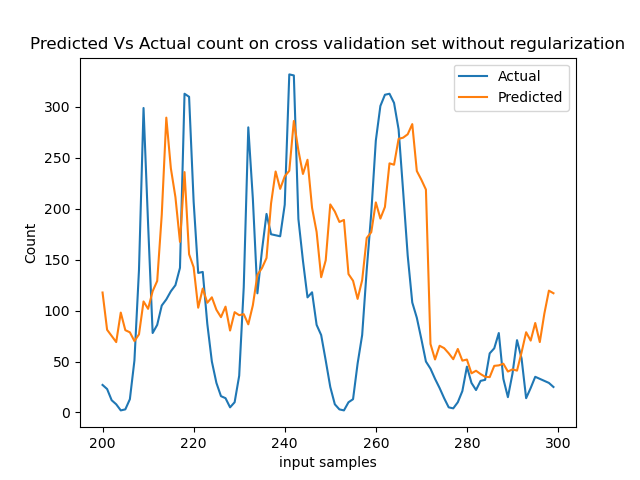

In [51]:
valY_act = valY*(df_ds.iloc[7]['count']-df_ds.iloc[3]['count'])+df_ds.iloc[3]['count']
valY_cap_act = valY_cap*(df_ds.iloc[7]['count']-df_ds.iloc[3]['count'])+df_ds.iloc[3]['count']
plt.figure()
plt.plot(valY_act[200:300],label='Actual')
plt.plot(valY_cap_act[200:300],label='Predicted')
plt.title('Predicted Vs Actual count on cross validation set without regularization')
plt.xlabel('input samples')
plt.ylabel('Count')
plt.legend(loc='best')
plt.show()

In [52]:
rmse_no_reg = np.sqrt(np.mean(np.square(valY_act - valY_cap_act)))
print('RMSE for the cross validation data is: {}'.format(rmse_no_reg))

RMSE for the cross validation data is: count    167.237206
dtype: float64


<IPython.core.display.Javascript object>


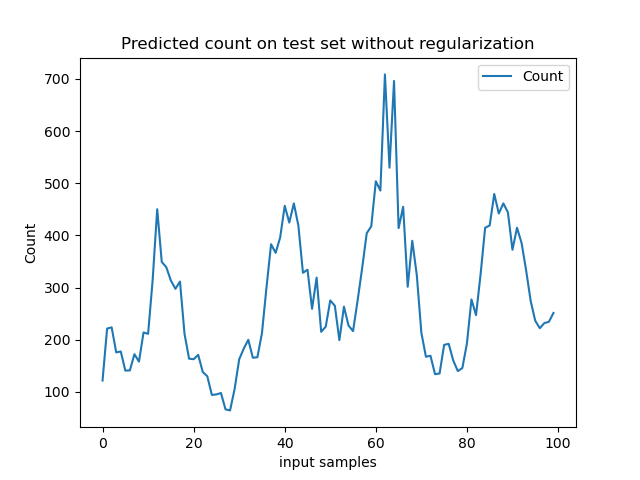

In [53]:
testY_cap = prediction(w, testX)
testY_cap_act = testY_cap*(df_ds.iloc[7]['count']-df_ds.iloc[3]['count'])+df_ds.iloc[3]['count']
plt.figure()
plt.plot(testY_cap_act[:100],label='Count')
plt.title('Predicted count on test set without regularization')
plt.xlabel('input samples')
plt.ylabel('Count')
plt.legend(loc='best')
plt.show()

In [54]:
y_test_cap = prediction(w, testX)
y_test_cap=pd.DataFrame(valY_cap, columns=['count']) 
y_test_cap.head(3)

,count
0,0.163206
1,0.137080
2,0.146613


In [55]:
reg_const = [ 0.001,0.003,0.01,0.03,0.1]
l1_w = []
for i in reg_const:
    w,Loss = gradient_descent(trainX, trainY ,alpha=5, iterations = 10000, norm=1,reg_const=i)
    print('weight parameters with L1 norm for reg_const {0} are:'.format(i))
    print(w)
    l1_w.append(w)
    valY_cap_l1 = prediction(w, valX)
    rmse_l1_reg = np.sqrt(np.mean(np.square(valY - valY_cap_l1)))
    print('RMSE for reg_const {0} is: {1}'.format(i,rmse_l1_reg))


weight parameters with L1 norm for reg_const 0.001 are:
[[ 0.13756084]
 [ 0.17326245]
 [ 0.35380469]
 [ 0.18502593]
 [ 1.17136302]
 [-1.14567907]
 [-3.20065862]
 [-1.34837289]]
RMSE for reg_const 0.001 is: count    0.175745
dtype: float64
weight parameters with L1 norm for reg_const 0.003 are:
[[ 0.12967499]
 [ 0.14056389]
 [ 0.34428037]
 [ 0.13566448]
 [ 0.14575541]
 [-0.10610593]
 [-3.21282666]
 [-1.27404936]]
RMSE for reg_const 0.003 is: count    0.176241
dtype: float64
weight parameters with L1 norm for reg_const 0.01 are:
[[ 1.13724981e-01]
 [ 8.16261962e-02]
 [ 3.08978550e-01]
 [ 7.20648982e-03]
 [-1.86425156e-03]
 [ 1.56404057e-03]
 [-3.08147557e+00]
 [-1.06623545e+00]]
RMSE for reg_const 0.01 is: count    0.17687
dtype: float64
weight parameters with L1 norm for reg_const 0.03 are:
[[-0.0178845 ]
 [-0.06247101]
 [ 0.07311545]
 [-0.00929195]
 [-0.00760109]
 [-0.21243629]
 [-2.96979858]
 [-0.73719493]]
RMSE for reg_const 0.03 is: count    0.194238
dtype: float64
weight parameters

<IPython.core.display.Javascript object>


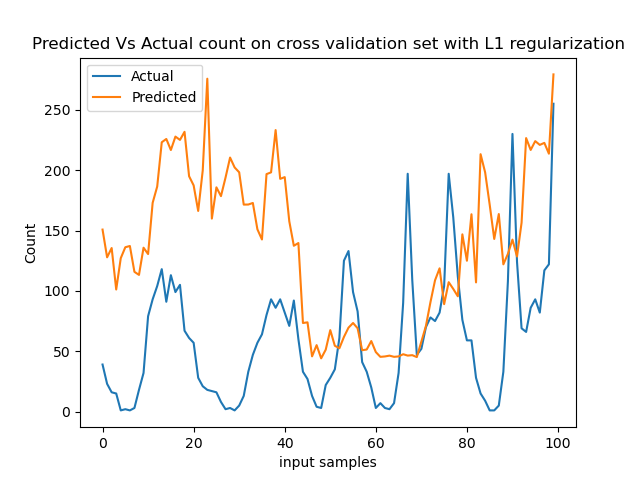

In [56]:
valY_cap_l1 = prediction(l1_w[0], valX)
valY_act_l1 = valY*(df_ds.iloc[7]['count']-df_ds.iloc[3]['count'])+df_ds.iloc[3]['count']
valY_cap_act_l1 = valY_cap_l1*(df_ds.iloc[7]['count']-df_ds.iloc[3]['count'])+df_ds.iloc[3]['count']
plt.figure()
plt.plot(valY_act_l1[:100],label='Actual')
plt.plot(valY_cap_act_l1[:100],label='Predicted')
plt.title('Predicted Vs Actual count on cross validation set with L1 regularization')
plt.xlabel('input samples')
plt.ylabel('Count')
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


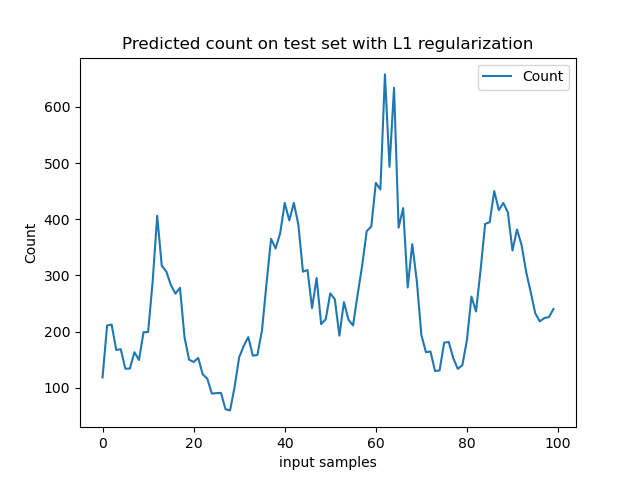

In [68]:
testY_cap_l1 = prediction(l1_w[0], testX)
testY_cap_act_l1 = testY_cap_l1*(df_ds.iloc[7]['count']-df_ds.iloc[3]['count'])+df_ds.iloc[3]['count']
plt.figure()
plt.plot(testY_cap_act_l1[:100],label='Count')
plt.title('Predicted count on test set with L1 regularization')
plt.xlabel('input samples')
plt.ylabel('Count')
plt.legend(loc='best')
plt.show()

In [58]:
reg_const = [0.0001,0.001,0.003,0.01]
l2_w = []
for i in reg_const:
    w,Loss = gradient_descent(trainX, trainY, iterations = 10000, norm=2,reg_const=i)
    print('weight parameters with L1 norm for reg_const {0} are:'.format(i))
    print(w)
    l2_w.append(w)
    plt.plot(Loss,label=i)
    valY_cap = prediction(w, valX)
    rmse_l2_reg = np.sqrt(np.mean(np.square(valY - valY_cap)))
    print('RMSE for reg_const {0} is {1}'.format(i,rmse_l2_reg))


weight parameters with L1 norm for reg_const 0.0001 are:
[[ 0.20657005]
 [ 0.22163597]
 [ 0.41675576]
 [ 0.20410437]
 [ 0.33957369]
 [-0.1831982 ]
 [-3.1917347 ]
 [-1.31855227]]
RMSE for reg_const 0.0001 is count    0.171402
dtype: float64
weight parameters with L1 norm for reg_const 0.001 are:
[[ 0.17920981]
 [ 0.16270002]
 [ 0.34999295]
 [ 0.08596776]
 [ 0.22775037]
 [-0.16433602]
 [-2.96201196]
 [-1.15797432]]
RMSE for reg_const 0.001 is count    0.171923
dtype: float64
weight parameters with L1 norm for reg_const 0.003 are:
[[ 0.13277592]
 [ 0.07143345]
 [ 0.24156871]
 [-0.06464141]
 [ 0.08056864]
 [-0.17058134]
 [-2.58996833]
 [-0.93241396]]
RMSE for reg_const 0.003 is count    0.174865
dtype: float64
weight parameters with L1 norm for reg_const 0.01 are:
[[ 0.03567657]
 [-0.08657984]
 [ 0.04097541]
 [-0.21003999]
 [-0.11706019]
 [-0.24646499]
 [-1.91250394]
 [-0.61252694]]
RMSE for reg_const 0.01 is count    0.186601
dtype: float64


<IPython.core.display.Javascript object>


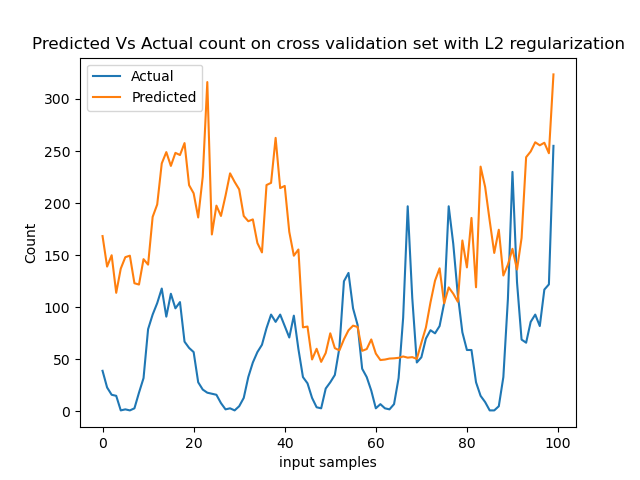

In [59]:
valY_cap_l2 = prediction(l2_w[0], valX)
valY_act_l2 = valY*(df_ds.iloc[7]['count']-df_ds.iloc[3]['count'])+df_ds.iloc[3]['count']
valY_cap_act_l2 = valY_cap_l2*(df_ds.iloc[7]['count']-df_ds.iloc[3]['count'])+df_ds.iloc[3]['count']
plt.figure()
plt.plot(valY_act_l2[:100],label='Actual')
plt.plot(valY_cap_act_l2[:100],label='Predicted')
plt.title('Predicted Vs Actual count on cross validation set with L2 regularization')
plt.xlabel('input samples')
plt.ylabel('Count')
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


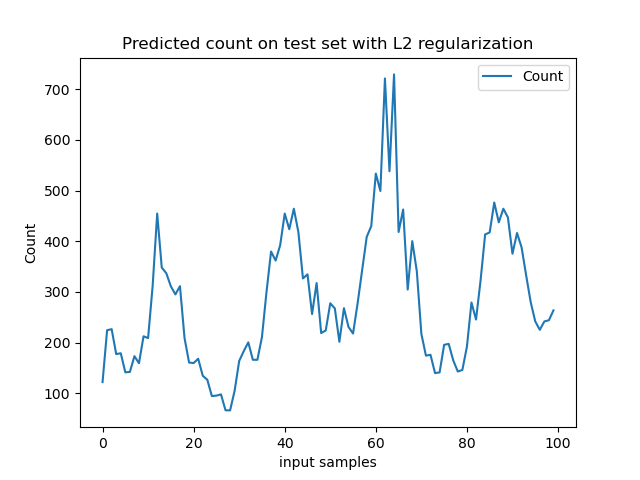

In [60]:
testY_cap = prediction(l2_w[0], testX)
testY_cap_act = testY_cap*(df_ds.iloc[7]['count']-df_ds.iloc[3]['count'])+df_ds.iloc[3]['count']
plt.figure()
plt.plot(testY_cap_act[:100],label='Count')
plt.title('Predicted count on test set with L2 regularization')
plt.xlabel('input samples')
plt.ylabel('Count')
plt.legend(loc='best')
plt.show()

## Part 5: most important features determining count of bikes rented

we can see this by plotting correlation of predicted values for rented bikes with other features.

In [61]:
testX_pd = pd.DataFrame(testX, columns=['year','hour','season','weather','temp','atemp','humidity','windspeed']) 
testX_pd.head(3)

,year,hour,season,weather,temp,atemp,humidity,windspeed
0,0.0,0.000000,0.0,0.0,0.25,0.2273,0.47619,0.464346
1,0.0,0.043478,0.0,0.0,0.25,0.2727,0.47619,0.000000
2,0.0,0.086957,0.0,0.0,0.25,0.2727,0.47619,0.000000


In [62]:
test_pred = pd.DataFrame(testY_cap_act, columns=['count']) 
test_pred.head(3)

,count
0,121.853314
1,224.220604
2,226.382033


In [63]:
test_pred.shape

(6493, 1)

In [64]:
testX_pd.shape

(6493, 8)

In [65]:
test_pred = pd.concat([test_pred ,testX_pd], axis=1)
test_pred.head(2)

,count,year,hour,season,weather,temp,atemp,humidity,windspeed
0,121.853314,0.0,0.000000,0.0,0.0,0.25,0.2273,0.47619,0.464346
1,224.220604,0.0,0.043478,0.0,0.0,0.25,0.2727,0.47619,0.000000


In [66]:
test_pred.isnull().sum()

count        0
year         0
hour         0
season       0
weather      0
temp         0
atemp        0
humidity     0
windspeed    0
dtype: int64

<IPython.core.display.Javascript object>


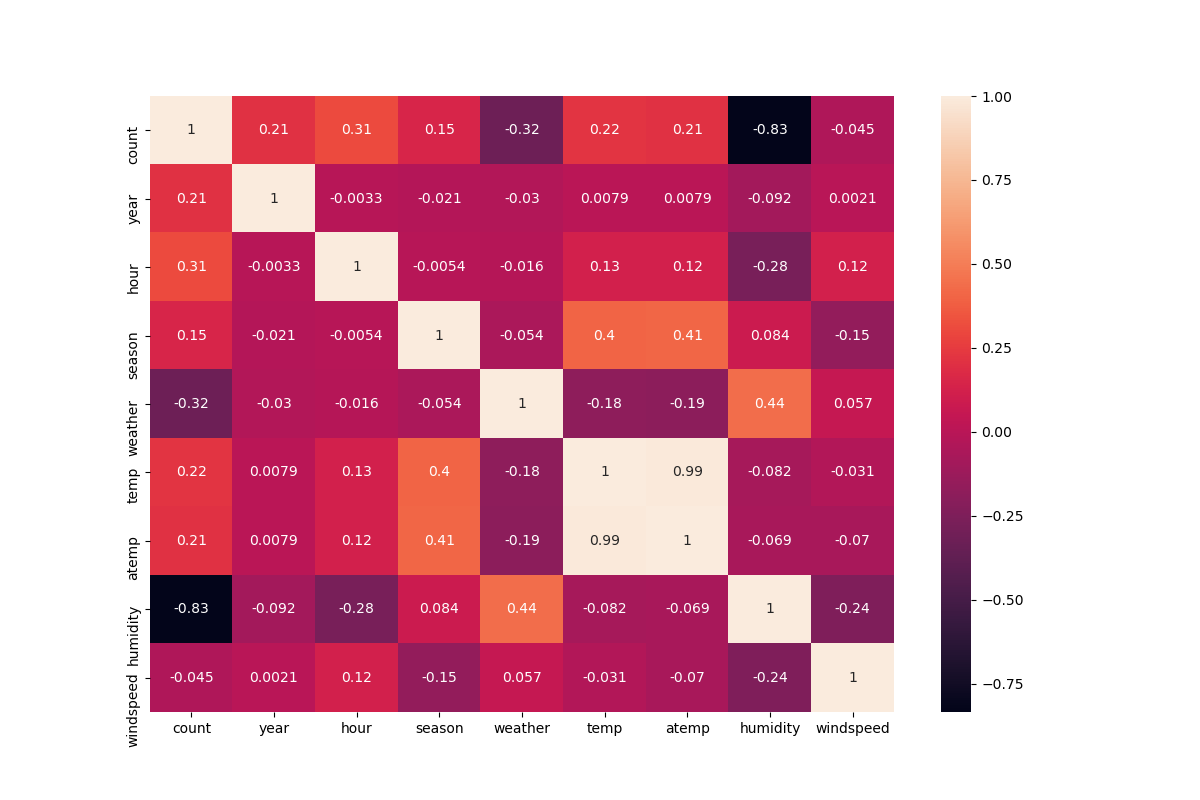

In [67]:
corr = test_pred.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True)
plt.show()

#### here we clearly see that features that are most usefull in determining bike rented count are humidity, weather, hour

_____________________________________________________________________________________________________________________________

Done by :- shubaham jain